In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tv = pd.read_csv('twitchdata-update.csv')

In [3]:
tv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Channel               1000 non-null   object
 1   Watch time(Minutes)   1000 non-null   int64 
 2   Stream time(minutes)  1000 non-null   int64 
 3   Peak viewers          1000 non-null   int64 
 4   Average viewers       1000 non-null   int64 
 5   Followers             1000 non-null   int64 
 6   Followers gained      1000 non-null   int64 
 7   Views gained          1000 non-null   int64 
 8   Partnered             1000 non-null   bool  
 9   Mature                1000 non-null   bool  
 10  Language              1000 non-null   object
dtypes: bool(2), int64(7), object(2)
memory usage: 72.4+ KB


In [4]:
tv.head()

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English


In [5]:
tv.isnull().sum()

# Nice~~!! NO null values

Channel                 0
Watch time(Minutes)     0
Stream time(minutes)    0
Peak viewers            0
Average viewers         0
Followers               0
Followers gained        0
Views gained            0
Partnered               0
Mature                  0
Language                0
dtype: int64

In [6]:
# Most Channel/Creators sorted by the Language 

tv['Language'].value_counts()

English       485
Korean         77
Russian        74
Spanish        68
French         66
Portuguese     61
German         49
Chinese        30
Turkish        22
Italian        17
Polish         12
Thai           11
Japanese       10
Czech           6
Arabic          5
Hungarian       2
Slovak          1
Other           1
Greek           1
Finnish         1
Swedish         1
Name: Language, dtype: int64

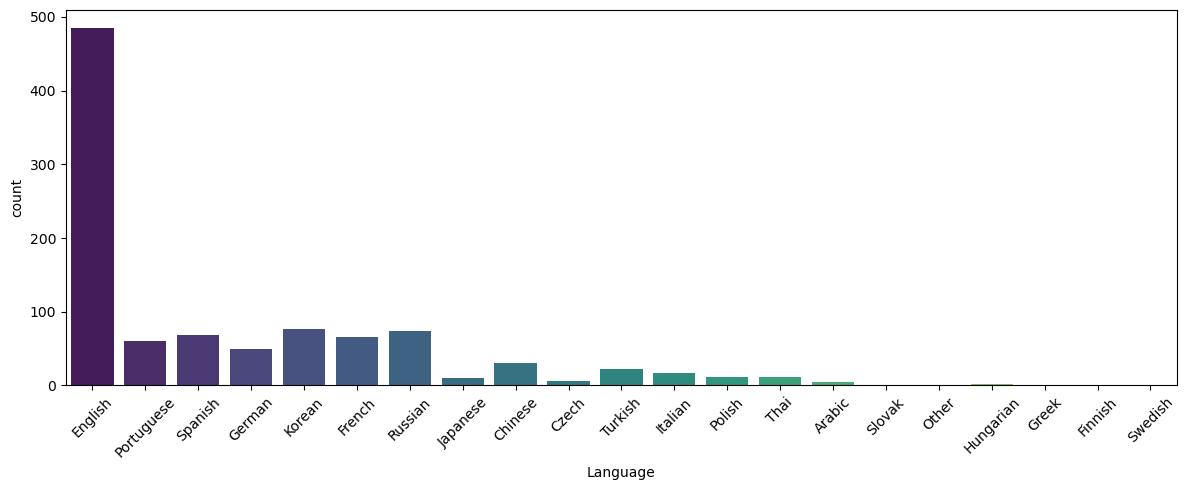

In [7]:
# Plotting Language

plt.figure(figsize=(12,5))
sns.countplot(data=tv, x='Language', palette='viridis')
plt.xticks(rotation = 45)
plt.tight_layout()

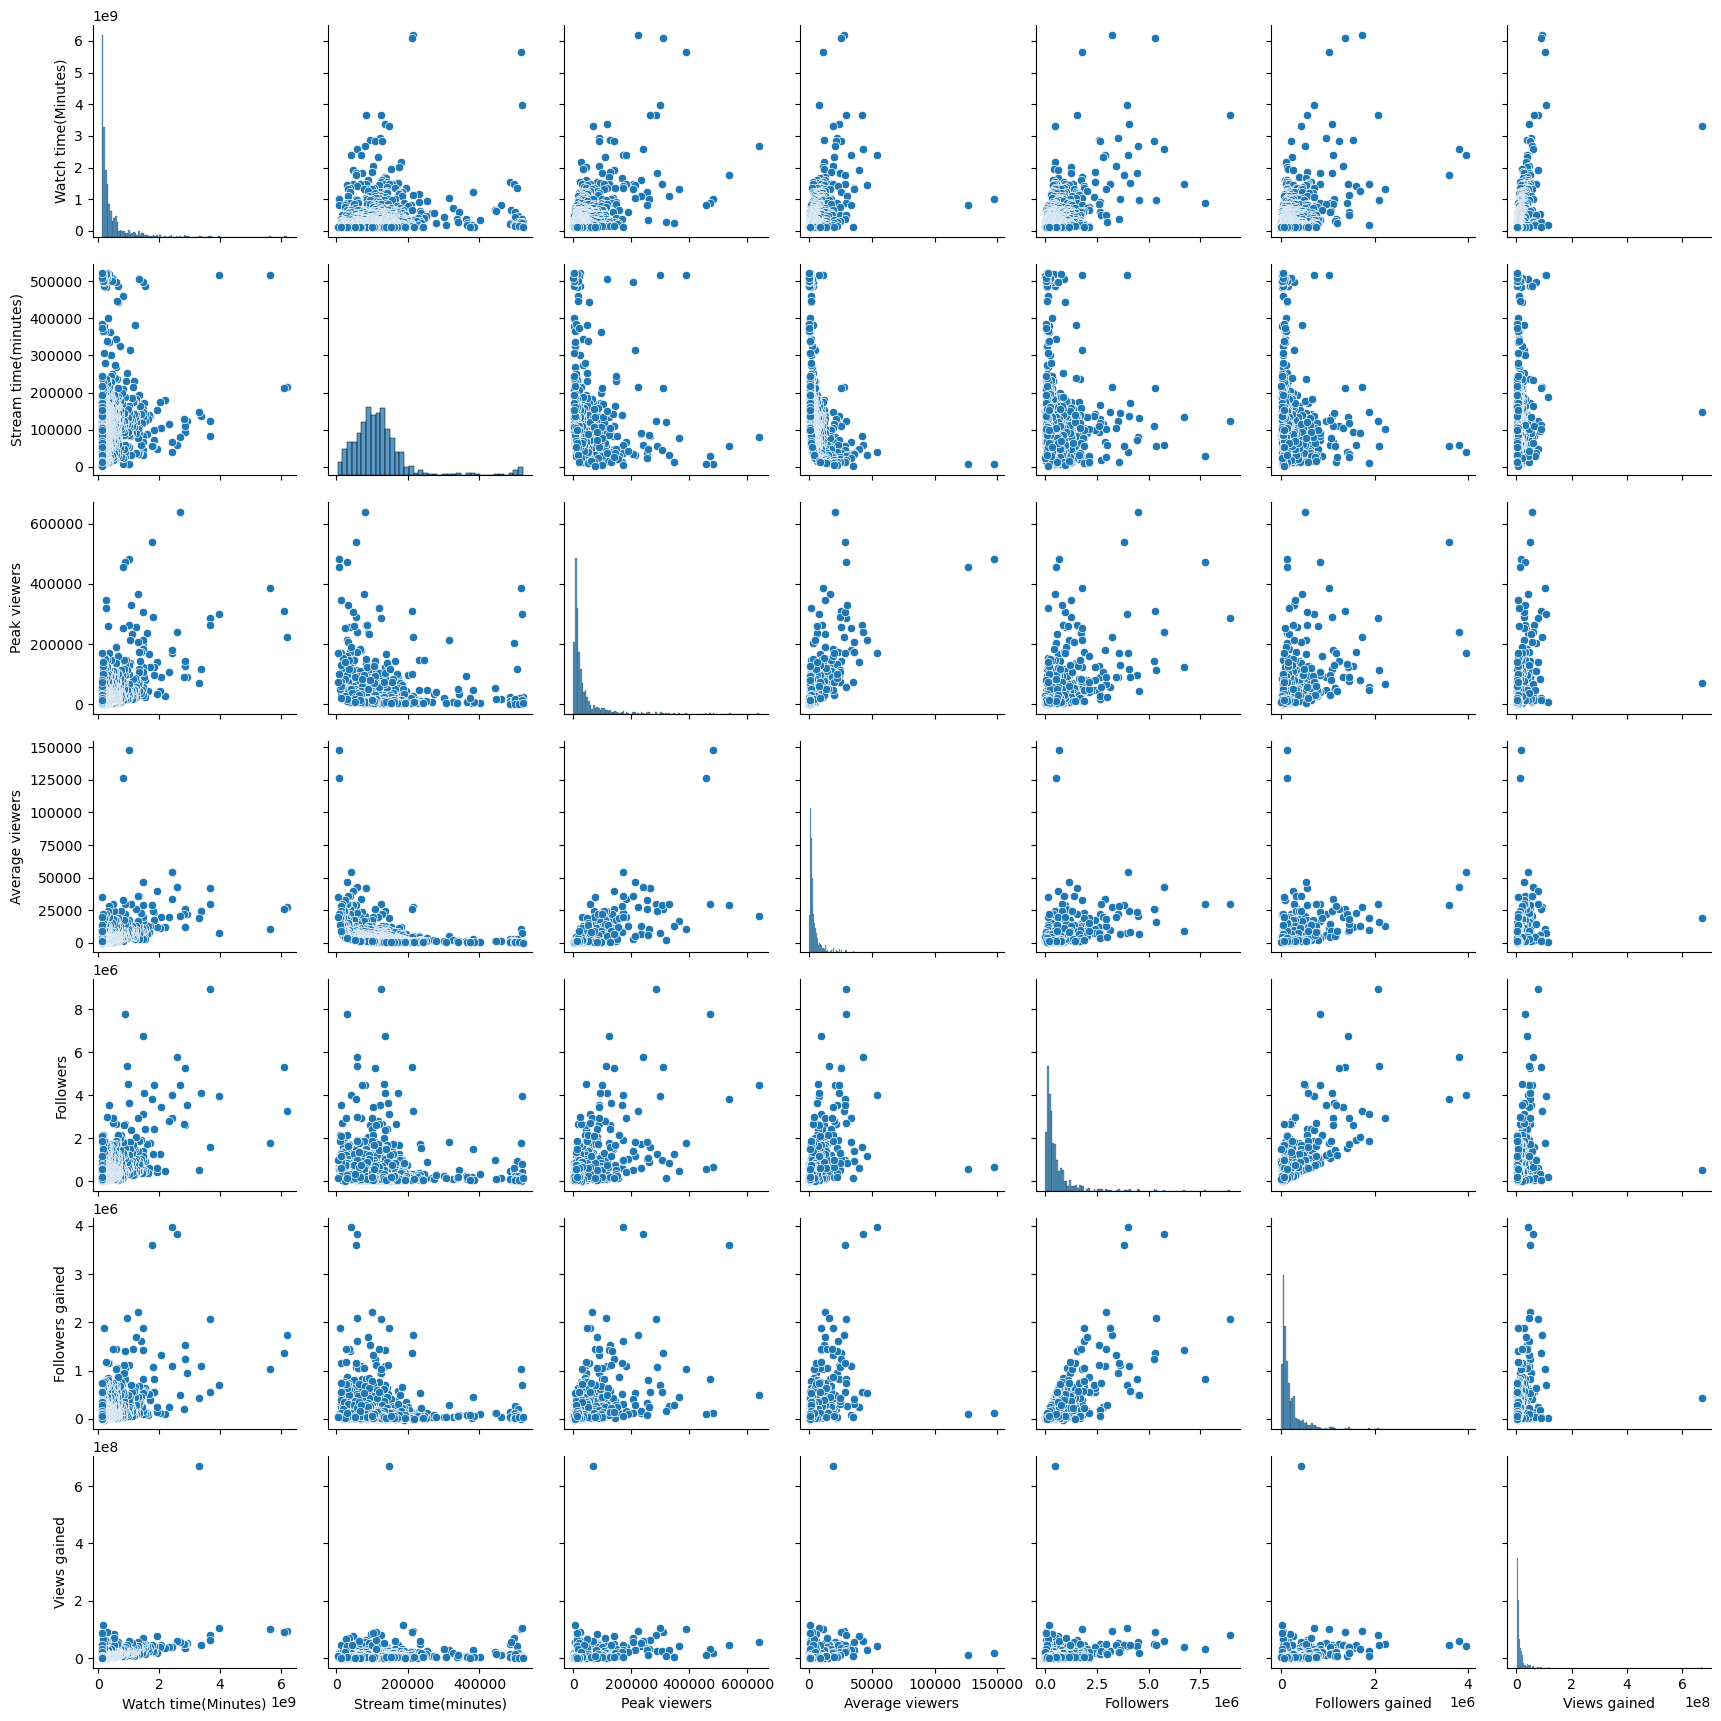

In [8]:
pair = tv.drop(['Channel', 'Language', 'Mature', 'Partnered'], axis =1)
sns.pairplot(data = pair)

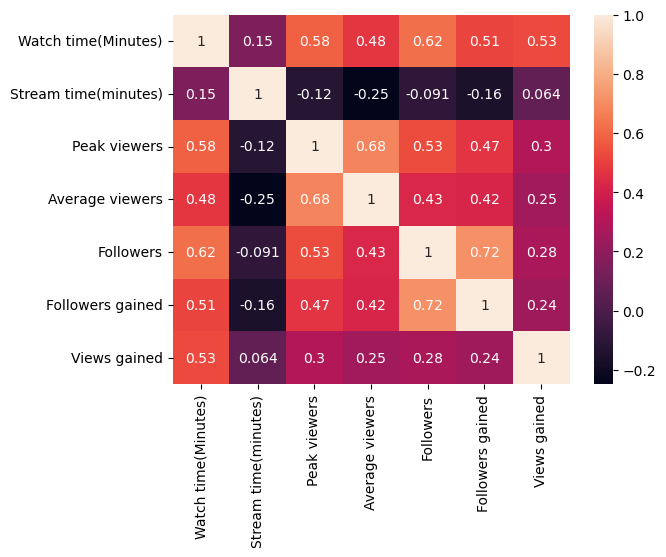

In [9]:
'''
This is a HeatMap to show which variable are dependent on each other by
the metric of the HeatMap

the variables with the most correlation are

Followers - Followers gained ( 0.72 )
Average Viewers  - Peak viewers ( 0.68 )
Watch time - followers ( 0.62 )



'''



heat = tv.drop(['Channel', 'Language', 'Mature', 'Partnered'], axis =1)
heat = heat.corr()
sns.heatmap(data=heat, annot=True)
plt.show()



<AxesSubplot:xlabel='Partnered', ylabel='count'>

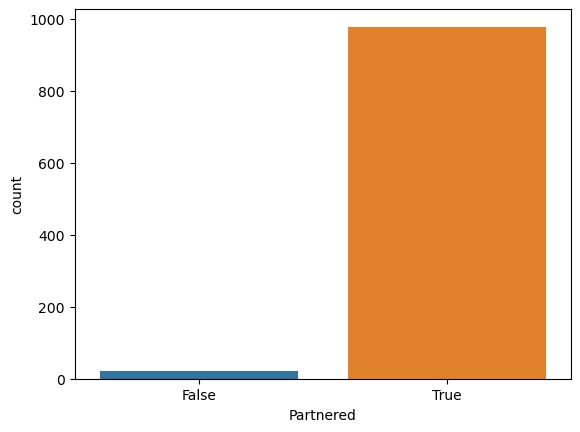

In [10]:
sns.countplot(data=tv, x='Partnered')

<AxesSubplot:xlabel='Mature', ylabel='count'>

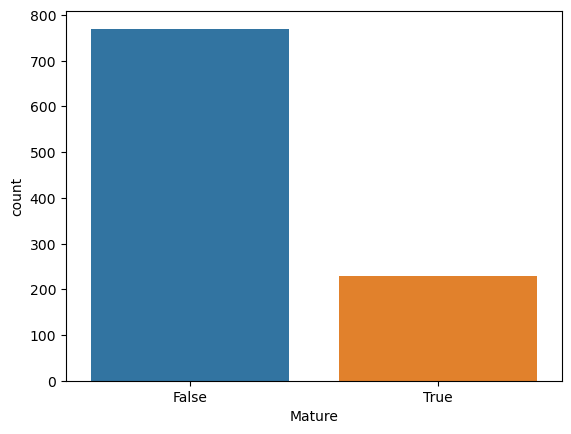

In [11]:
sns.countplot(data=tv, x='Mature')

<AxesSubplot:xlabel='Stream time(minutes)', ylabel='Followers gained'>

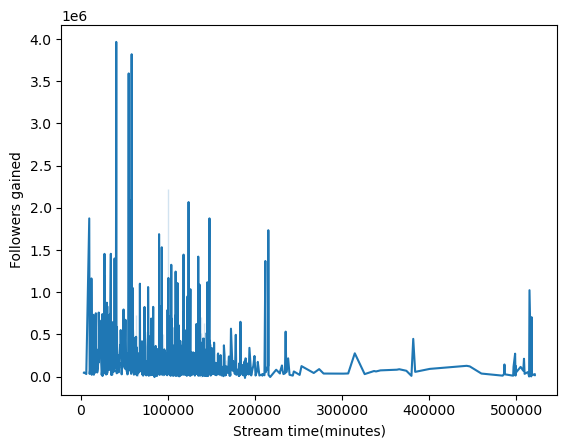

In [12]:
sns.lineplot(x = tv['Stream time(minutes)'], y = tv['Followers gained'])

In [13]:
test_f = tv[["Channel", "Followers"]]
test_f = test_f.sort_values(by="Followers", ascending=False)
test_f

,Channel,Followers
4,Tfue,8938903
96,shroud,7744066
35,Myth,6726893
13,Rubius,5751354
90,pokimane,5367605
...,...,...
923,칸데르니아 (jmjdoc),30877
828,MarketTradersTV,30413
677,NiteNightKid,28818
974,Sinner666,7102


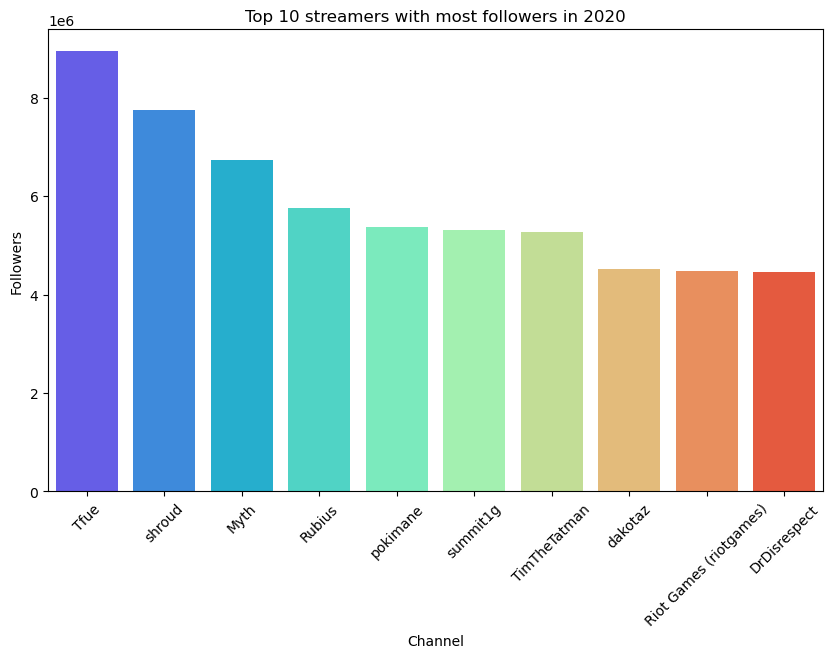

In [14]:
fig = plt.figure(figsize=(10, 6))
followers = sns.barplot(x=test_f["Channel"][:10], y=test_f["Followers"][:10], palette="rainbow")
plt.title("Top 10 streamers with most followers in 2020")
plt.xticks(rotation=45)
plt.show()

In [15]:
test_st = tv[["Channel", "Stream time(minutes)"]]
test_st = test_st.sort_values(by="Stream time(minutes)", ascending=False)
test_st

,Channel,Stream time(minutes)
392,RiffTrax,521445
992,RelaxBeats,521430
746,Monstercat,519675
306,RocketBeansTV,518415
469,SaltyTeemo,517980
...,...,...
81,dota2ti,6315
109,dota2ti_ru,6195
811,DreamHackDota2_RU,6135
927,Call of Duty (callofduty),3645


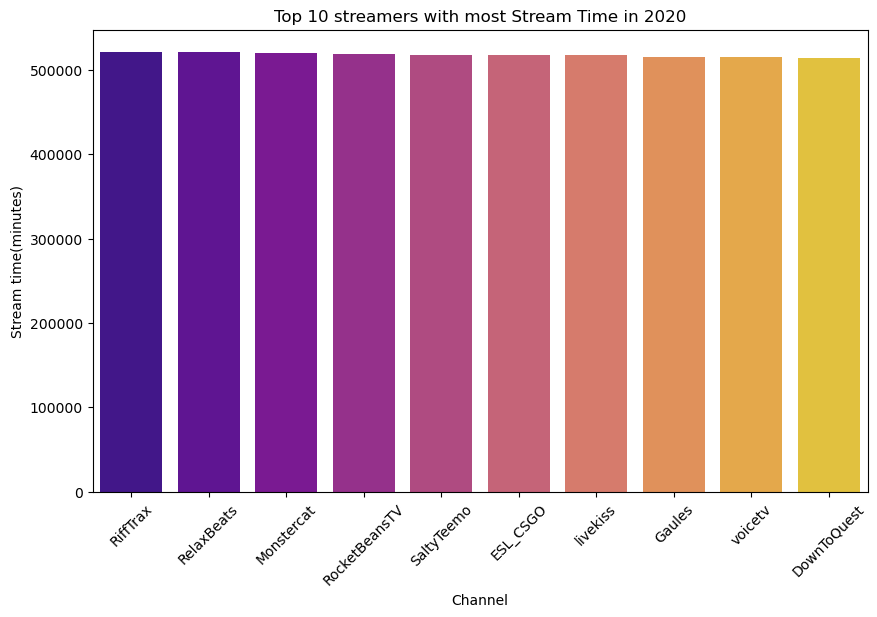

In [16]:
fig = plt.figure(figsize=(10, 6))
stream_time = sns.barplot(x=test_st["Channel"][:10], y=test_st["Stream time(minutes)"][:10], palette="plasma")
plt.title("Top 10 streamers with most Stream Time in 2020")
plt.xticks(rotation=45)
plt.show()

In [17]:
test_avg = tv[["Channel", "Average viewers"]]
test_avg = test_avg.sort_values(by="Average viewers", ascending=False)
test_avg

,Channel,Average viewers
81,dota2ti,147643
109,dota2ti_ru,126232
14,auronplay,53986
41,LCS,46459
13,Rubius,42948
...,...,...
758,voicetv,314
746,Monstercat,313
828,MarketTradersTV,297
890,Japan_ASMR,271


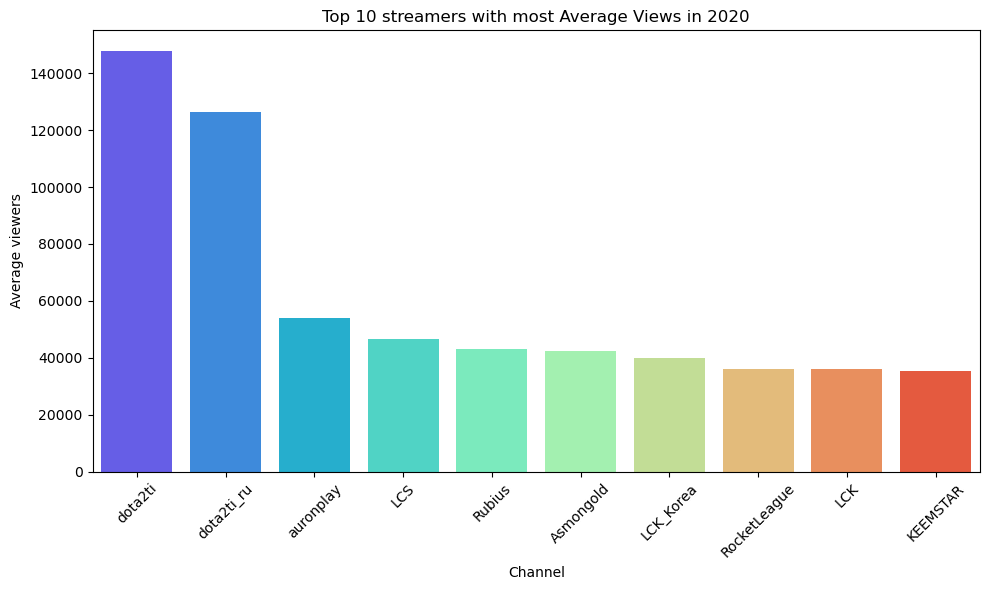

In [18]:
plt.figure(figsize=(10,6))
avg_views = sns.barplot(x = test_avg['Channel'][:10], y = test_avg['Average viewers'][:10], palette='rainbow')
plt.title("Top 10 streamers with most Average Views in 2020")
plt.xticks(rotation = 45)
plt.tight_layout()

In [19]:
test_pk = tv[["Channel", "Peak viewers"]]
test_pk = test_pk.sort_values(by="Peak viewers", ascending=False)
test_pk

,Channel,Peak viewers
12,Riot Games (riotgames),639375
25,TheGrefg,538444
81,dota2ti,483530
96,shroud,471281
109,dota2ti_ru,457060
...,...,...
758,voicetv,1874
469,SaltyTeemo,1803
828,MarketTradersTV,1357
578,runitup247,1182


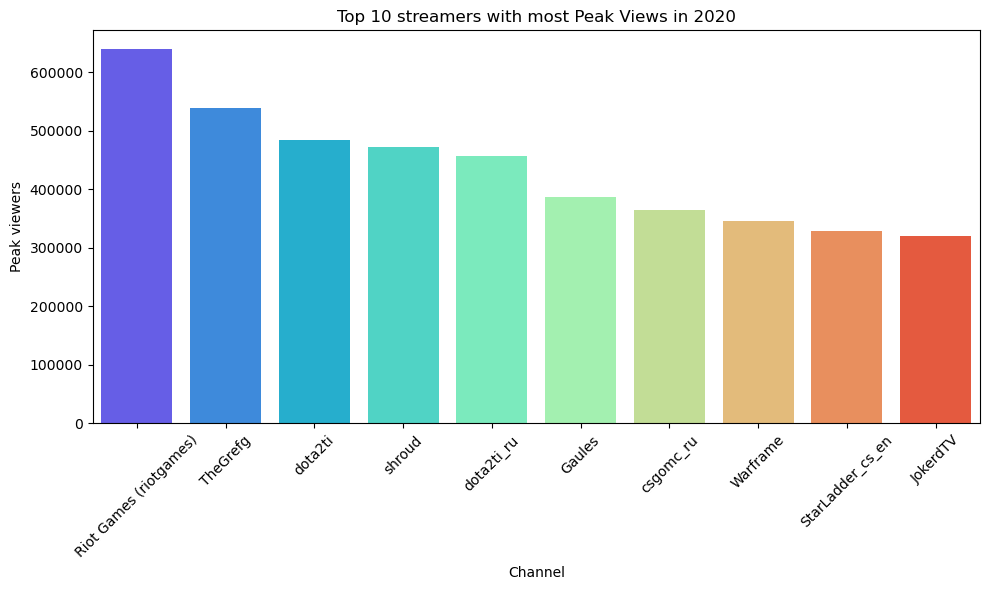

In [20]:
plt.figure(figsize=(10,6))
peak = sns.barplot(x = test_pk['Channel'][:10], y = test_pk['Peak viewers'][:10], palette='rainbow')
plt.title("Top 10 streamers with most Peak Views in 2020")
plt.xticks(rotation = 45)
plt.tight_layout()

In [21]:
test_fg = tv[['Channel', 'Followers gained']]
test_fg = test_fg.sort_values('Followers gained', ascending=False)
test_fg

,Channel,Followers gained
14,auronplay,3966525
13,Rubius,3820532
25,TheGrefg,3593081
51,Bugha,2220765
90,pokimane,2085831
...,...,...
758,voicetv,1328
779,Dyrus,111
997,마스카 (newmasca),-4942
499,Amaz,-5405


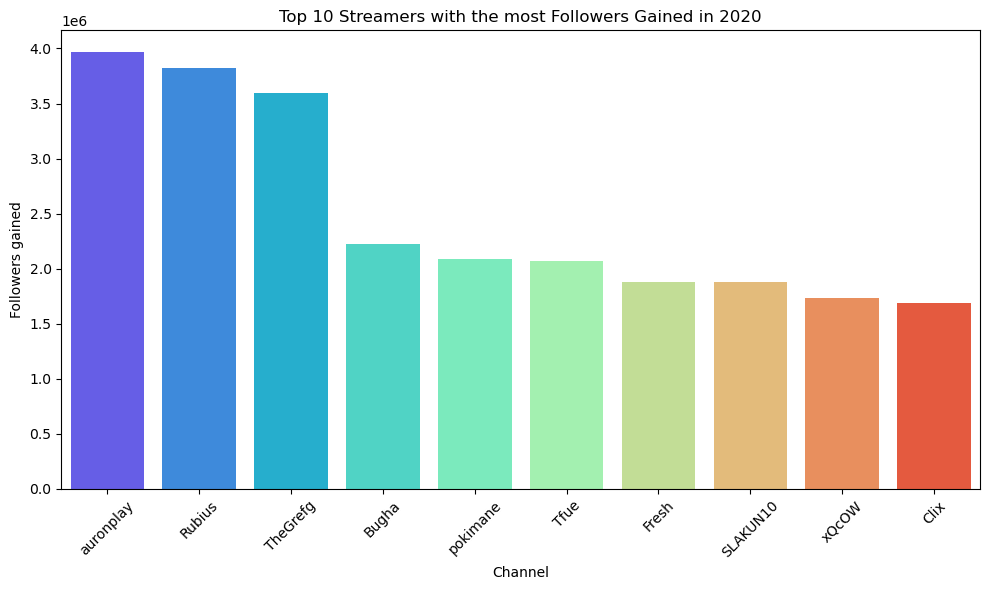

In [22]:
plt.figure(figsize=(10,6))
fg = sns.barplot(x = test_fg['Channel'][:10], y = test_fg['Followers gained'][:10], palette='rainbow')
plt.title('Top 10 Streamers with the most Followers Gained in 2020')
plt.xticks(rotation = 45)
plt.tight_layout()